<div style="background-color: #f0f0f0; text-align: center; color: #007bff; padding: 10px;">
    
# Implementing Support Vector Machine for Predicting BMI Status

</div>

## Loading the Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
data = pd.read_csv("bmiii/bmi_train.csv")
data.tail()

,Gender,Height,Weight,Index
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5
399,Male,161,155,5


## Getting to know the Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
data.describe()

,Height,Weight,Index
count,400.000000,400.000000,400.000000
mean,170.362500,106.060000,3.737500
std,16.574011,32.362242,1.370507
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,106.500000,4.000000
75%,184.000000,136.250000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

**Data Insights**

- Our data contains no missing values. 

## Data Preprocessing

In [6]:
# Encoding the Gender column({male: 1, female:0})
encod = LabelEncoder()
data['Gender'] = encod.fit_transform(data['Gender'])
data.head(10)

,Gender,Height,Weight,Index
0,1,161,89,4
1,1,179,127,4
2,1,172,139,5
3,1,153,104,5
4,1,165,68,2
5,1,172,92,4
6,1,182,108,4
7,1,179,130,5
8,1,142,71,4
9,0,158,153,5


In [7]:
data['Gender'].value_counts()

Gender
1    200
0    200
Name: count, dtype: int64

*Data Insights*
- We can find an equal proportion of indivials with respect to Gender

In [8]:
# Unique values in the Gender Column
data['Index'].unique()

array([4, 5, 2, 3, 1, 0], dtype=int64)

In [9]:
bins = (-1,0,1,2,3,4,5)
Status = ['Malnourished', 'Underweight', 'Fit', 'Slightly Overweight', 'Overweight', 'Extremely overweighted']
data['Index'] = pd.cut(data['Index'], bins = bins, labels = Status)
data.head()

,Gender,Height,Weight,Index
0,1,161,89,Overweight
1,1,179,127,Overweight
2,1,172,139,Extremely overweighted
3,1,153,104,Extremely overweighted
4,1,165,68,Fit


## Data Visulization

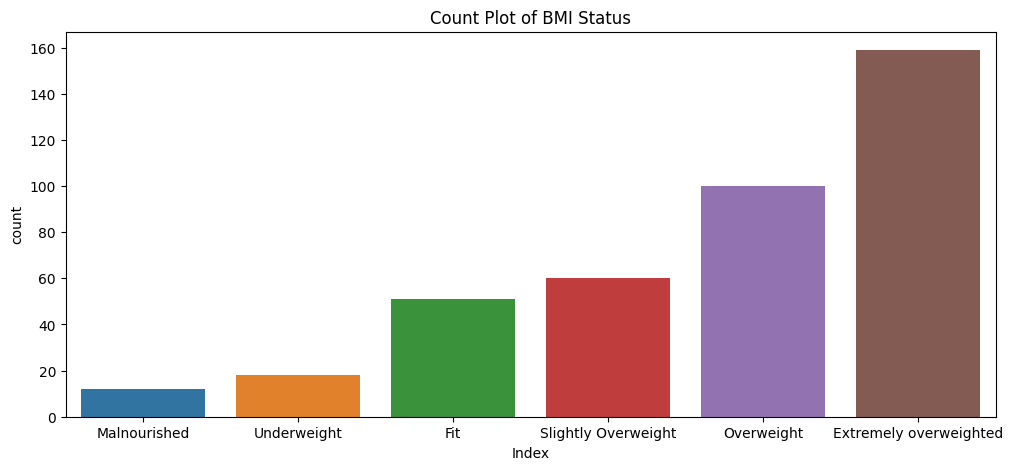

In [10]:
# Count  Plot
plt.figure(figsize = (12,5))
sns.countplot(data = data, x = data['Index'], hue = 'Index');
plt.title("Count Plot of BMI Status");

Text(0.5, 1.0, 'Count Plot of Gender wrt Health Status')

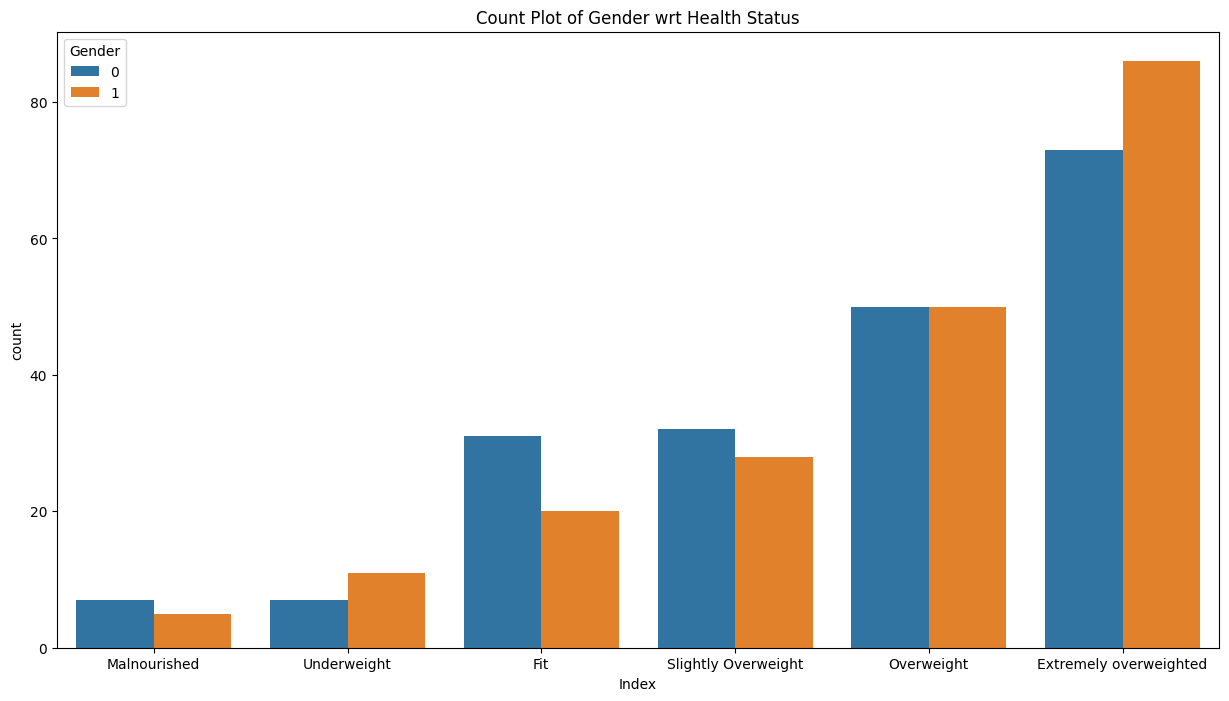

In [11]:
# Count plot on Gender
plt.figure(figsize = (15,8))
sns.countplot(data = data, x = 'Index', hue = 'Gender')
plt.title("Count Plot of Gender wrt Health Status")

<Figure size 1500x800 with 0 Axes>

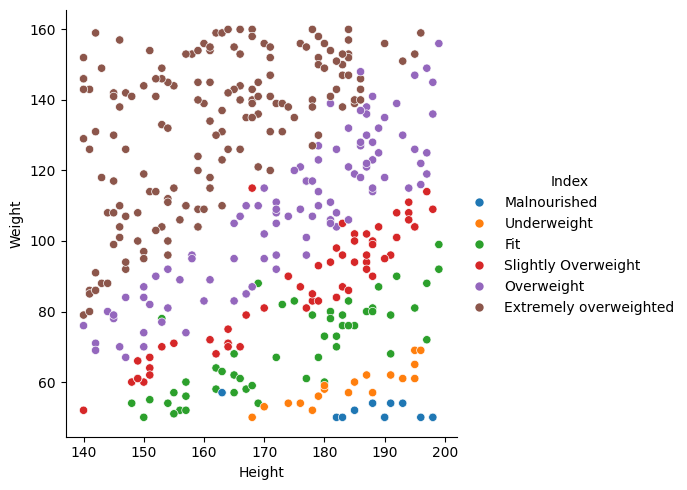

In [12]:
# Scatter plot
plt.figure(figsize = (15,8))
sns.relplot(data = data, x = 'Height', y = 'Weight', hue = 'Index')

**Plot Insights**
- We can really see any relation in weight and height in this dataset. It is kind of scattered everywhere, but we can connect the Index with the value of Height and Weight.

<Figure size 1500x800 with 0 Axes>

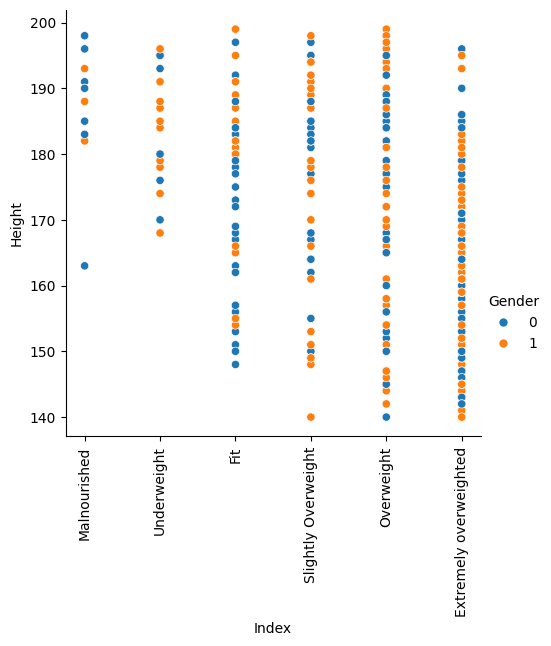

In [13]:
plt.figure(figsize = (15,8));
sns.relplot(data = data, x = 'Index', y = 'Height', hue = 'Gender');
plt.xticks(rotation = 90);

**Plot Insights**

We can see that
- Malnourished people tend to have more height.
- Extremely Overweight people have equal distribution of height.


## Model Building

In [14]:
# Getting the features
X = data.drop(['Index'], axis = 1)
y = data['Index']

In [15]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
# Using Standard Scaler to standardize the features to improve the accuracy of the model
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [17]:
# Model Creation, Training, Predicting
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

<Axes: >

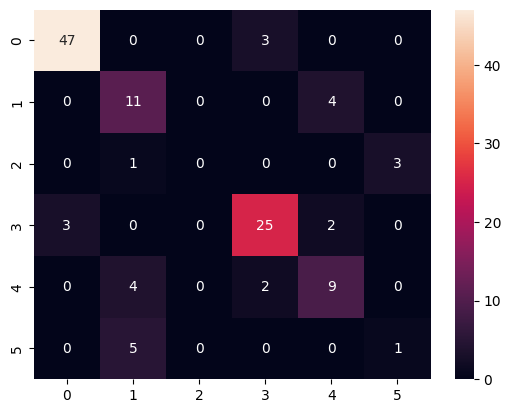

In [18]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True)

**Plot Insights**
- Above is the heatmap showing the confusion matrix. More details can be seen in the below classification report.

In [19]:
print(classification_report(y_test, pred))

                        precision    recall  f1-score   support

Extremely overweighted       0.94      0.94      0.94        50
                   Fit       0.52      0.73      0.61        15
          Malnourished       0.00      0.00      0.00         4
            Overweight       0.83      0.83      0.83        30
   Slightly Overweight       0.60      0.60      0.60        15
           Underweight       0.25      0.17      0.20         6

              accuracy                           0.78       120
             macro avg       0.52      0.55      0.53       120
          weighted avg       0.75      0.78      0.76       120



In [20]:
print("The accuracy score of the model is: ", accuracy_score(y_test, pred))

The accuracy score of the model is:  0.775


## BMI STATUS PREDICTOR

In [24]:
def bmiStatusPredictor(gender, Height, Weight):
    user_info = [[gender, Height, Weight]]
    scaledUserInfo = scalar.transform(user_info)
    result = clf.predict(scaledUserInfo)
    return result
gender = input("Enter your Gender(0 for Female and 1 for Male): ")
Height = input("Enter your height(in cms): ")
Weight = input("Enter your weight(in kgs): ")
Status = bmiStatusPredictor(gender, Height, Weight)
print("Status of your Body mass Index: ",Status[0])


Enter your Gender(0 for Female and 1 for Male) 1
Enter your height(in cms) 45
Enter your weight(in kgs) 69


Status of your Body mass Index is:  Overweight


**Conclusion**
- We have implemented Support Vector Machine to predict in which class an individual with a specific gender, Height, Weight belongs to.
- We can see that we have obtained an impressive acccuracy of 77.5%.